<a href="https://colab.research.google.com/github/awitz23/LinkedIn/blob/main/Hybrid/Hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To-Do:
1. Number of Bins GB/BB ***DONE***
2. BB überprüfen ***DONE***
3. Ergebnis überprüfen (Summe/Visu) ***DONE***
4. Pipeline funktioniert auf allen Tagen ***DONE***
4. Flyeralarmpunkt **DONE**
4. Zweite Iteration Choose Variant anpassen ***DONE***
4. Zweite Iteration Visualisierung ***DONE***
5. Visualisierung der Ergebnisse
13123139. Bestes Ergebnis ausgeben ***DONE***


To-Do:
1. Visualisierung
  1.1 1. Iteration, zeigen, dass Axis Split und Sort Algo wurscht is und was die besten Kombinationen sind 
  1.2 2. Iteration fixen 
  1.3 2. Iteration Heatmap aufhübschen (krasserer Kontrast und Größer)
  1.4 2. Iteration Good iterations (Verbesserungen die die 2. Iteration bringt darstellen) Welcher passt zu welchem, Welcher Score, Wichtige Infos: Welche 2 Algorithmen interagieren

2. Daten fertig machen
3. Allgemein auch mal drüber nachdenken wie deskriptive/Darstellung etc.


1. Bad Boys mit geringer priority in den nächsten Tag legen und Ergebnisse vergleichen.
3. Nachdenken über Optimierung der Bad Boys bzw. komplexere Daten vielleicht versuchen? Sortieralgo selbst definieren, EA, Bin Algo, andere Druckbögen testen (komplexere)

# Start Up

In [ ]:
!pip install -q rectpack

In [ ]:
import pandas as pd
import numpy as np
import re
import rectpack.guillotine as guillotine
import glob
import matplotlib.patches as patches
import rectpack.packer as packer


from heapq import nsmallest

%matplotlib inline
# Visualize
from plotnine import *
import matplotlib.patches as patches
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from seaborn.axisgrid import FacetGrid



#from rectpack.packer import PackerBNF, PackerBFF, PackerBBF, PackerOnlineBNF
#from rectpack.packer import SORT_NONE, SORT_AREA, SORT_PERI, SORT_DIFF, SORT_SSIDE, SORT_LSIDE, SORT_RATIO
from matplotlib import pyplot as plt
from rectpack import newPacker
from os import listdir
from os.path import isfile, join
from pathlib import Path
M = 50000    # big M ist eine sehr große Zahl

In [ ]:
packer_list = [guillotine.GuillotineBssfSas, guillotine.GuillotineBssfLas,guillotine.GuillotineBssfSlas,guillotine.GuillotineBssfLlas,guillotine.GuillotineBssfMaxas, guillotine.GuillotineBssfMinas,guillotine.GuillotineBlsfSas,guillotine.GuillotineBlsfLas,guillotine.GuillotineBlsfSlas,guillotine.GuillotineBlsfLlas,guillotine.GuillotineBlsfMaxas,guillotine.GuillotineBlsfMinas,guillotine.GuillotineBafSas,guillotine.GuillotineBafLas,guillotine.GuillotineBafSlas,guillotine.GuillotineBafLlas,guillotine.GuillotineBafMaxas,guillotine.GuillotineBafMinas]
packer_names = ['GuillotineBssfSas', 'GuillotineBssfLas','GuillotineBssfSlas','GuillotineBssfLlas','GuillotineBssfMaxas','GuillotineBssfMinas','GuillotineBlsfSas','GuillotineBlsfLas','GuillotineBlsfSlas',
'GuillotineBlsfLlas','GuillotineBlsfMaxas','GuillotineBlsfMinas','GuillotineBafSas','GuillotineBafLas','GuillotineBafSlas','GuillotineBafLlas','GuillotineBafMaxas','GuillotineBafMinas']

heuristic_list = [packer.SORT_NONE, packer.SORT_AREA, packer.SORT_PERI, packer.SORT_DIFF, packer.SORT_SSIDE, packer.SORT_LSIDE, packer.SORT_RATIO]
heuristic_names = ['SORT_NONE', 'SORT_AREA', 'SORT_PERI', 'SORT_DIFF', 'SORT_SSIDE', 'SORT_LSIDE', 'SORT_RATIO']


# single_packer_name = ['GuillotineBafMaxas']
# single_packer = [guillotine.GuillotineBafMaxas]

# # #  Nur zum testen
# packer_list = [guillotine.GuillotineBssfSas, guillotine.GuillotineBssfLas, guillotine.GuillotineBafLas, guillotine.GuillotineBafSlas]
# heuristic_list = [packer.SORT_NONE, packer.SORT_AREA, packer.SORT_DIFF]
# packer_names = ['GuillotineBssfSas', 'GuillotineBssfLas','GuillotineBafLas', 'GuillotineBafSlas']
# heuristic_names = ['SORT_NONE', 'SORT_AREA', 'SORT_DIFF']

# packer_list = [guillotine.GuillotineBssfSas, guillotine.GuillotineBssfLas,guillotine.GuillotineBssfSlas,guillotine.GuillotineBssfLlas]
# heuristic_list = [packer.SORT_NONE, packer.SORT_AREA, packer.SORT_PERI]
# packer_names = ['GuillotineBssfSas', 'GuillotineBssfLas','GuillotineBssfSlas','GuillotineBssfLlas']
# heuristic_names = ['SORT_NONE', 'SORT_AREA', 'SORT_PERI']


In [ ]:
pd.set_option('max_rows', 20)
pd.set_option('max_colwidth', 4000)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 4000]


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

from google.colab import drive
drive.mount('/content/drive')

# Pfad zu einem Ordner mit mehreren Dateien
data_path = r"/content/drive/MyDrive/PJS/01_Input/Daten_v1_clean/01_Preprocessed/prep_flyerdata_170_ma_a18.csv"
data_path_team1 = r"/content/drive/MyDrive/PJS/01_Input/Daten_v1_clean/01_Preprocessed/prep_flyerdata_170_ma_a18.csv"

Mounted at /content/drive


# Pipeline

In [ ]:
def divConquerPip(data_path, dict_day, packer_list, packer_names, heuristic_list, heuristic_names, data_path_team1):
  #Schritt 1: Daten laden, bins, rectangles für Optimierung, df_flyeralarm zu Schnittzahlberechnung von flyeralarm
  bins, rectangles, df_tag = loadData(data_path, dict_day)
  #Schritt 2: Anzahl der Schnitte bei flyeralarm berechnen
  cuts_flyeralarm, bins_flyeralarm = Auswertung_Flyeralarm(data_path_team1, df_tag)
  #print(cuts_flyeralarm, bins_flyeralarm)

  #Schritt 3: Bewertung der besten Varianten anhand der Schnittanzahl und Binanzahl
  print('Cuts: ', cuts_flyeralarm, 'bins: ', bins_flyeralarm)
  iteration = True
  j = 0
  temp_df = packerResult(rectangles, bins, packer_list, packer_names, heuristic_list, heuristic_names, iteration)
  print('PackerResult done')
  temp_df = boy_assignment(temp_df, temp_df,iteration, j)
  print('boy_assignment done')
  temp_df, df_visualize_1_Iteration = variant_comparison(temp_df, iteration, bins_flyeralarm, cuts_flyeralarm)
  df_data = temp_df
  print('variant_comparison done')
  temp_df = choose_variant(temp_df, dict_day, iteration)
  print('choose_variant done')
  if dict_day["Visualization"]==True:
    graph = visualize(df_visualize_1_Iteration, cuts_flyeralarm, bins_flyeralarm, iteration)   

  #Create Dataframe after Firstpacking with x best variants
  iteration = False
  temp_df, df2 = packing_bad_boy(temp_df, bins, packer_list, packer_names, heuristic_list, heuristic_names, iteration)
  #muss noch angepasst werden auf die zweite Iteration. Welcher Vergleich nimmt man? max_bin vom ersten oder zweiten?
  df2, df_visualize_2_Iteration = variant_comparison(df2, iteration, bins_flyeralarm, cuts_flyeralarm)
  
  if dict_day["Visualization"]==True:
    graph = visualize(df_visualize_2_Iteration, cuts_flyeralarm, bins_flyeralarm, iteration)   

  return df_tag, df2, df_data, df_visualize_1_Iteration, df_visualize_2_Iteration, cuts_flyeralarm, bins_flyeralarm

# Funktionen

In [ ]:
# Daten auslesen und in bins und rectangles aufteilen - Jede Zeile entspricht einem Flyer bzw. einem Behälter 
def loadData(data_path,dict_day):
  df = pd.DataFrame(pd.read_csv(data_path, sep=',', header=0))
  #print(df.info())
  #df = df.rename(columns={"heigh": "height"})
  df = round_df(df)
  bins = df.copy()
  df = dailybusiness(df,dict_day)
  if df.empty:
    print('For this day, there are no jobs')
  
  bins['Tuple'] = list(zip(bins.x_sheetsize, bins.y_sheetsize))
  bins = bins['Tuple'].values.tolist()
  
  rectangles = df.copy()
  rectangles['Tuple'] = list(zip(rectangles.width, rectangles.height))
  rectangles = rectangles['Tuple'].values.tolist()
  
  return bins, rectangles, df

In [ ]:
# Auslesen eines spezifischen Tags aus den Daten (wird im Dictionary eingestellt)
def dailybusiness(df, dict_day):

  df_daily = df.loc[(df['day'] == dict_day["Day"]) & (df['month'] == dict_day["Month"])]
  
  return df_daily

# Visualize functions

In [ ]:
#gibt KPI zum Vergleich der verschiedenen Algorithmen aus
def variant_comparison(df, iteration, bins_flyeralarm, cuts_flyeralarm):

  score_list, count_list, bin_list, bin_list2, count_list2, score_list2, Pack1_name_list, Sort1_name_list, Pack2_name_list2, Sort2_name_list2,  Pack1_name_list_list, Sort1_name_list_list, Score1_list_list,  = ([] for i in range(13))
  #max_count = df.sum_cut_1Packing.max()
  #max_bin_number = df.Number_of_Bins_1Packing.max()
  j = -1
  if iteration == True:
    for index, row in df.iterrows():
      count = row['sum_cut_1Packing']
      bin_number = row['Number_of_Bins_1Packing']
      Pack1_name = row['Packer_name_1Packing']
      Sort1_name = row['Heuristic_1Packing']

      math_count = count/cuts_flyeralarm
      math_bin = bin_number/bins_flyeralarm

      variant_score = (math_count + math_bin)/2
      score_list.append(variant_score)

      count_list.append(count)
      bin_list.append(bin_number)
      Pack1_name_list.append(Pack1_name)
      Sort1_name_list.append(Sort1_name)

      # Pack1_name = row['Packer_name_1Packing']
      # Sort1_name = row['Heuristic_1Packing']
      # Pack1_name_list.append(Pack1_name)
      # print(Pack1_name_list,"SIAFasifaisfisainxyv")
      # Sort1_name_list.append(Sort1_name)

    df['score_1Packing'] = score_list

  elif iteration != True:
    for index, row in df.iterrows():
     # print(row)
      score_list, count_list, bin_list, Pack1_name_list, Sort1_name_list, Pack2_name_list, Sort2_name_list, Score1_list = ([] for i in range(8))
      j = j + 1
      #Pack/sort1 rausziehen
      for i in range(len(df['Packer_name_2Packing'][j])):
        #pack/sort2 rausziehen
        count = row['sum_cut_2Packing'][i]
        bin_number = row['Number_of_Bins_2Packing'][i]
        Pack2_name = row['Packer_name_2Packing'][i] 
        Sort2_name = row['heuristic_2Packing'][i]
        

        Pack1_name = row['Packer_name_1Packing']
        Sort1_name = row['Heuristic_1Packing']
        Score1 = row ['score_1Packing']

        math_count = count/cuts_flyeralarm
        math_bin = bin_number/bins_flyeralarm   

        variant_score = (math_count + math_bin)/2
        score_list.append(variant_score)

        count_list.append(count)
        bin_list.append(bin_number)
        Pack2_name_list.append(Pack2_name)
        Sort2_name_list.append(Sort2_name)

        Pack1_name_list = [Pack1_name] * len(df['Packer_name_2Packing'][j])
        Sort1_name_list = [Sort1_name] * len(df['Packer_name_2Packing'][j])
        Score1_list = [Score1] * len(df['Packer_name_2Packing'][j])

      Pack1_name_list_list.append(Pack1_name_list)
      Sort1_name_list_list.append(Sort1_name_list)
      Score1_list_list.append(Score1_list)

      score_list2.append(score_list)
      count_list2.append(count_list)
      bin_list2.append(bin_list)
      Pack2_name_list2.append(Pack2_name_list)
      Sort2_name_list2.append(Sort2_name_list)

      Pack2_name_list = Pack2_name_list2
      Sort2_name_list = Sort2_name_list2
      score_list = score_list2
      count_list = count_list2
      
      bin_list = bin_list2


    df['score_2Packing'] = score_list


  if iteration == True:
    df_visualize = pd.DataFrame(
      {'Cut_Count': count_list,
      'Bin_Number': bin_list,
      'Packer_name_1': Pack1_name_list,
      'Sort_name_1': Sort1_name_list,
      'Score_1' : score_list
      })
    conditions=[(df_visualize['Packer_name_1'].str.contains('Bssf')),(df_visualize['Packer_name_1'].str.contains('Baf')),(df_visualize['Packer_name_1'].str.contains('Blsf'))]
    choices=['Bssf','Baf','Blsf']
    df_visualize['Rect_choice']=np.select(conditions,choices)
    conditions2=[(df_visualize['Packer_name_1'].str.contains('Sas')),(df_visualize['Packer_name_1'].str.contains('Las')),(df_visualize['Packer_name_1'].str.contains('Slas')),(df_visualize['Packer_name_1'].str.contains('Llas')),(df_visualize['Packer_name_1'].str.contains('Maxas')),(df_visualize['Packer_name_1'].str.contains('Minas'))]
    choices2=['Sas','Las','Slas','Llas','Maxas','Minas']
    df_visualize['AxisSplit_choice']=np.select(conditions2,choices2)
  
 
    
  elif iteration != True:
    df_visualize = pd.DataFrame(
    {'Cut_Count': count_list,
     'Bin_Number': bin_list,
     'Packer_name_1': Pack1_name_list_list,
     'Sort_name_1': Sort1_name_list_list,
     'Packer_name_2': Pack2_name_list,
     'Sort_name_2' : Sort2_name_list,
     'Score1' : Score1_list_list,
     'Score2' : score_list
     })
    
    # df_test_visu = df_visualize.explode('Cut_Count')
    # df_test_visu = df_test_visu.explode('Bin_Number')
    # df_test_visu = df_test_visu.explode('Packer_name_2')
    # df_test_visu = df_test_visu.explode('Sort_name_2')
    # df_visualize = df_test_visu
    

  return df, df_visualize

In [ ]:
#um es in pipelin einzubauen bruacht es noch 'cuts_flyer, bins_fyler, iteration' und sollte das auch returnen

def gen_visualizationdf(df):
  
  #df_var1 = pd.DataFrame(df.iloc[0], columns =['Cut_Count','Bin_Number','Packer_name_1','Sort_name_1','Packer_name_2','Sort_name_2'])
  
  #irgendwie als Datframe statt als series auslesen
  df_var1 = df.iloc[0]
  df_var1 = df_var1.reset_index()
  df_var1 = df_var1.transpose()

  df_var2 = df.iloc[1]
  df_var2 = df_var2.reset_index()
  df_var2 = df_var2.transpose()

  df_var3 = df.iloc[2]
  df_var3 = df_var3.reset_index()
  df_var3 = df_var3.transpose()
  
  df_var4 = df.iloc[3]
  df_var4 = df_var4.reset_index()
  df_var4 = df_var4.transpose()

  df_var5 = df.iloc[4]
  df_var5 = df_var5.reset_index()
  df_var5 = df_var5.transpose()

  df_var6 = df.iloc[5]
  df_var6 = df_var6.reset_index()
  df_var6 = df_var6.transpose()

  df_var7 = df.iloc[6]
  df_var7 = df_var7.reset_index()
  df_var7 = df_var7.transpose()


  df_var8 = df.iloc[7]
  df_var8 = df_var8.reset_index()
  df_var8 = df_var8.transpose()
  
  df_var9 = df.iloc[8]
  df_var9 = df_var9.reset_index()
  df_var9 = df_var9.transpose()

  df_var10 = df.iloc[9]
  df_var10 = df_var10.reset_index()
  df_var10 = df_var10.transpose()

  # df_var11 = df.iloc[10]
  # df_var11 = df_var11.reset_index()
  # df_var11 = df_var11.transpose()

  # df_var12 = df.iloc[11]
  # df_var12 = df_var12.reset_index()
  # df_var12 = df_var12.transpose()

  # df_var13 = df.iloc[12]
  # df_var13 = df_var13.reset_index()
  # df_var13 = df_var13.transpose()
  
  # df_var14 = df.iloc[13]
  # df_var14 = df_var14.reset_index()
  # df_var14 = df_var14.transpose()

  # df_var15 = df.iloc[14]
  # df_var15 = df_var15.reset_index()
  # df_var15 = df_var15.transpose()

  # df_var16 = df.iloc[15]
  # df_var16 = df_var16.reset_index()
  # df_var16 = df_var16.transpose()

  # df_var17 = df.iloc[16]
  # df_var17 = df_var17.reset_index()
  # df_var17 = df_var17.transpose()


  # df_var18 = df.iloc[17]
  # df_var18 = df_var18.reset_index()
  # df_var18 = df_var18.transpose()
  
  # df_var19 = df.iloc[18]
  # df_var19 = df_var19.reset_index()
  # df_var19 = df_var19.transpose()

  # df_var20 = df.iloc[19]
  # df_var20 = df_var20.reset_index()
  # df_var20 = df_var20.transpose()

  

  

  i=0
  df_var1 = exploding(df_var1,i)
  i+=1
  df_var2 = exploding(df_var2,i)
  i+=1
  df_var3 = exploding(df_var3,i)
  i+=1
  df_var4 = exploding(df_var4,i)
  i+=1
  df_var5 = exploding(df_var5,i)
  i+=1
  df_var6 = exploding(df_var6,i)
  i+=1
  df_var7 = exploding(df_var7,i)
  i+=1
  df_var8 = exploding(df_var8,i)
  i+=1
  df_var9 = exploding(df_var9,i)
  i+=1
  df_var10 = exploding(df_var10,i)
  # i+=1
  # df_var11 = exploding(df_var11,i)
  # i+=1
  # df_var12 = exploding(df_var12,i)
  # i+=1
  # df_var13 = exploding(df_var13,i)
  # i+=1
  # df_var14 = exploding(df_var14,i)
  # i+=1
  # df_var15 = exploding(df_var15,i)
  # i+=1
  # df_var16 = exploding(df_var16,i)
  # i+=1
  # df_var17 = exploding(df_var17,i)
  # i+=1
  # df_var18 = exploding(df_var18,i)
  # i+=1
  # df_var19 = exploding(df_var19,i)
  # i+=1
  # df_var20 = exploding(df_var20,i)
  


  # df_total = df_var1
  # df_total.append(df_var2, ignore_index=True)
  # df_total.append(df_var3, ignore_index=True)
  # df_total.append(df_var4, ignore_index=True)
  # df_total.append(df_var5, ignore_index=True)
  df_total = pd.concat([df_var1, df_var2, df_var3, df_var4, df_var5, df_var6, df_var7, df_var8, df_var9, df_var10], ignore_index=True)


  return df_var1, df_var2, df_var3, df_var4, df_var5, df_total

In [ ]:
def exploding(df,i):
  temp7_list, Diff_list,Algo_indi_list,Vari_indi_list = ([] for i in range(4))

  temp1 = df[0].tolist()
  temp1 = temp1[1]

  temp2 = df[1].tolist()
  temp2 = temp2[1]


  temp3 = df[2].tolist()
  temp3 = temp3[1]

  temp4 = df[3].tolist()
  temp4 = temp4[1]

  temp7 = df[6].tolist()
  temp7 = temp7[1]


  temp5 = df[4].tolist()
  temp5 = temp5[1]

  temp6 = df[5].tolist()
  temp6 = temp6[1]

  temp8 = df[7].tolist()
  temp8 = temp8[1]
  


  
  # for k in range(len(temp1)):
  #   temp7_list.append(temp7)

  for l in range(len(temp1)):
    Diff = temp7[l] - temp8[l]
    Diff_list.append(Diff)
    Algo_indi_list.append(l)
    Vari_indi_list.append(i)
  
  df_visu = pd.DataFrame(
    {'Cut_Count': temp1,
     'Bin_Number': temp2,
     'Packer_name_1': temp3,
     'Sort_name_1': temp4,
     'Packer_name_2': temp5,
     'Sort_name_2' : temp6,
     'Score1' : temp7,
     'Score2' : temp8,
     'Score_Diff' : Diff_list,
     'Algo_indicator' : Algo_indi_list,
     'Variant_indicator' : Vari_indi_list
     }, columns=['Cut_Count', 'Bin_Number', 'Packer_name_1', 'Sort_name_1', 'Packer_name_2', 'Sort_name_2', 'Score1', 'Score2','Score_Diff','Algo_indicator','Variant_indicator'])
  
 

  return df_visu

In [ ]:
# Visualisierung der berechneten Schnittanzahl und Binanzahl sowie der Flyeralarm-Lösung
def visualize(df, cuts_flyer, bins_fyler, iteration):

  if iteration == True:
    # print("plots.1.Iter")
    # print('Visualization 1. Iteration')
    # print("Methode 1")
    # print("WITH TRANSPARENCY")
    # print(ggplot(df, aes(x='Cut_Count', y='Bin_Number', color='AxisSplit_choice', shape='Sort_name_1')) + geom_point(alpha=0.3) + facet_wrap('~Rect_choice') + geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red")) 
    # print("WITHOUT TRANSPARENCY")
    # print(ggplot(df, aes(x='Cut_Count', y='Bin_Number', color='AxisSplit_choice', shape='Sort_name_1')) + geom_point() + facet_wrap('~Rect_choice') + geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red")) 
    # print("---------------------------------------------------------------------------------------")
   # print("Methode 2")
    #print("WITH TRANSPARENCY")
    #print(ggplot(df, aes(x='Cut_Count', y='Bin_Number', color='Rect_choice', shape='Sort_name_1')) + geom_point(alpha=0.3) + facet_wrap('~AxisSplit_choice') + geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red")) 
    #print("WITHOUT TRANSPARENCY")
    #print(ggplot(df, aes(x='Cut_Count', y='Bin_Number', color='Rect_choice', shape='Sort_name_1')) + geom_point() + facet_wrap('~AxisSplit_choice') + geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red")) 
    #print("---------------------------------------------------------------------------------------")
    print("Methode 3")
    #print("WITH TRANSPARENCY")
    #print(ggplot(df, aes(x='Cut_Count', y='Bin_Number', color='Rect_choice', shape='AxisSplit_choice')) + geom_point(alpha=0.3) + facet_wrap('~Sort_name_1') + geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red")) 
    print("WITHOUT TRANSPARENCY")
    #print(ggplot(df, aes(x='Cut_Count', y='Bin_Number', color='Rect_choice', shape='AxisSplit_choice')) + geom_point() + facet_wrap('~Sort_name_1') + geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red")) 
    print("---------------------------------------------------------------------------------------")
    print("Methode 4")
    #print(ggplot(df, aes(x='Cut_Count', y='Bin_Number', color='Sort_name_1')) + geom_point() + facet_wrap('~Packer_name_1') + geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red")) 
    print("---------------------------------------------------------------------------------------")
    print("Methode 5")
    #print(ggplot(df, aes(x='Cut_Count', y='Bin_Number', color='Packer_name_1')) + geom_point() + facet_wrap('~Sort_name_1') + geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red")) 
    
    
    # plotting scatterplot with histograms for features total bill and tip.
    #sns.set_palette("Paired")
    #g = sns.jointplot(data=df_visualize_1_Iteration,  x="Cut_Count", y="Bin_Number",
                  #kind="scatter", hue="Rect_choice", palette="Paired")
    #g.plot_marginals(sns.histplot, hue="AxisSplit_choice")

  if iteration == False:
     print('Visualization 2. Iteration')
  #   print(ggplot(df, aes(x='Cut_Count[0]', y='Bin_Number[0]')) +geom_point(colour="blue")+
  #         geom_point(aes(x='Cut_Count[1]', y='Bin_Number[1]'), colour="red") +
  #         geom_point(aes(x='Cut_Count[2]', y='Bin_Number[2]'), colour="orange") +
  #         geom_point(aes(x='Cut_Count[3]', y='Bin_Number[3]'), colour="yellow") +
  #         geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="magenta")     
  #         )

In [ ]:
def VisulizationBins(list_boys):
  output = []
  bw = 2494.488189    # bin width
  bh  = 1785.826772   # bin height

  for bin in list_boys:
    abin = pd.DataFrame(bin, columns = ['x_left', 'y_bot', 'width', 'height'])
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')

    for index, row in abin.iterrows():
      #print('bin:', bw, "/", bh, "\nwith nr of rectangles in bin:", len(abin), '\n')
      x, y, w, h = abin.loc[index].x_left, abin.loc[index].y_bot, abin.loc[index].width, abin.loc[index].height
      output.append([x,y,w,h])
      plt.axis([0,bw,0,bh])
      # print(w, h, '\n')
      ax.add_patch(
          patches.Rectangle(
              (x, y),     # (x,y)
              w,          # width
              h,          # height
              facecolor="#00ffff",
              edgecolor="black",
              linewidth=3
          )
      )
      fig.savefig("rect_%(index)s.png" % locals(), dpi=144, bbox_inches='tight')


#Flyeralarm ausbesserung

In [ ]:
def Auswertung_Flyeralarm(data_path_team1, df):
  # Ließt alle Schnittbögen (aus den präparierten Daten) anhand der JobID die an einen definierten Tag erstellt wurden um die Summe der benötigten Schnitte und Bins auszurechnen. 
  # Ausgabe ist die Anzahl der benötigten Schnitte und Bins für den vorbestimmten Tag.

  number_rectangles = len(df)
  width = df['width'].sum()
  height = df['height'].sum()
  sum_area = width + height
  print('Flyeralarm: ', sum_area)
  df_complete = df.copy()
  df = df.drop_duplicates(subset='JobID', keep="first")
  count_cuts_day = df['count_cut'].sum()
 
  count_bins_day = len(df)

  return count_cuts_day, count_bins_day

In [ ]:
# Berechnet für jede Kombination von Packing- und Sort-Algorithmen die Anzahl von benötigten Behältern(Bins) und speichert die Ergebnisse in ein DataFrame.
def packerResult(rectangles, bins, packer_list, packer_names, heuristic_list, heuristic_names, iteration):
  rect_num, pack_heu_list, result_pack_name, result_heu_name, result, result_rectangles = ([] for i in range(6))
 
  i = 0

  for pack in packer_list:
    name = packer_names[i]
    i = i + 1
    j = 0  
    for heuristic in heuristic_list:
      heu_name = heuristic_names[j]
      j = j + 1
      packer, max_value, rect_num = packerCreation(pack, heuristic, rectangles, bins)
      result_pack_name.append(name)
      result_heu_name.append(heu_name)
      result.append(max_value) 
      result_rectangles.append(rect_num)
      pack_heu_list.append(packer)

      if iteration == True:
        df = pd.DataFrame(list(zip(result_pack_name, result_heu_name, result, pack_heu_list, result_rectangles)),
               columns =['Packer_name_1Packing', 'Heuristic_1Packing', 'Number_of_Bins_1Packing', 'packer_1Packing', 'rectangles'])    
      else:
        df = pd.DataFrame(list(zip(result_pack_name, result_heu_name, result, pack_heu_list, result_rectangles)),
               columns =['Packer_name_2Packing', 'Heuristic_2Packing', 'Number_of_Bins_2Packing', 'packer_2Packing', 'rectangles'])
  return df

In [ ]:
# Packt alle Rechtecke in die Behälter.
def packerCreation(pack, heuristic, rectangles, bins):
  packer = newPacker(pack_algo = pack, rotation = 1, sort_algo = heuristic)
  for r in rectangles:
    packer.add_rect (*r )
  for b in bins :
    packer.add_bin(*b)  
  packer.pack()
  rect_num = packer.rect_list()
  rect_num = pd.DataFrame(rect_num)
  max_value = rect_num[0].max()
  max_value = max_value + 1 #rect_list startet bei 0 nicht 1
  return packer, max_value, rect_num

In [ ]:
def boy_assignment(df, df_gesamt, iteration, j):
  #In dieser Methode werden 4 Schritte ausgeführt:
  #Schritt 1: Anhand der extrahierten Daten wird die Schnittanzahl berechnet.
  #Schritt 2: Die Daten werden in eine Form gebracht so dass der Packingalgorithmus angewandt werden kann.
  #Schritt 3: Es wird für jedes Bin überprüft ob dieses (nahezu) optimal gepackt ist.
  #Schritt 4: Das Daten werden mit weiteren Informationen angereichert (Packer_Name, verwendete Heuristik, Zahl der benötigten Bins etc.)

  cut_list, sum_cutlist_before, sum_cutlist_after, tuple_list= ([] for i in range(4))

  for index, row in df.iterrows():
    sum_cut, faulty =cut_count_amounter(row, iteration)
    rectangle = 'rectangles'
    if faulty == True:
      print('Faulty packer')
    else:
      df_temp = back_to_the_origin(row, rectangle)
      df_temp = check_badboy(df_temp, rectangle)
      cut_list.append(sum_cut)
      if iteration != True:
        sum_cut_after = sum_cut + df_gesamt['sum_gb_1Packing'][j]
        sum_cut_before = df_gesamt['sum_cut_1Packing']
        sum_cutlist_after.append(sum_cut_after)
        sum_cutlist_before.append(sum_cut_before)
      tuple_of_df = list(df_temp.itertuples(index=False, name=None))
      tuple_list.append(tuple_of_df)

  df2 = pd.Series(tuple_list).to_frame('Variant')
  if iteration == True:
    df2[['packer_1Packing', 'Packer_name_1Packing', 'Heuristic_1Packing', 'Number_of_Bins_1Packing']] = df[['packer_1Packing', 'Packer_name_1Packing', 'Heuristic_1Packing', 'Number_of_Bins_1Packing']]
    df2['sum_cut_1Packing'] = cut_list
  else:
    df2[['packer_1Packing', 'Packer_name_1Packing', 'Heuristic_1Packing', 'Number_of_Bins_1Packing']] = df_gesamt[['packer_1Packing', 'Packer_name_1Packing', 'Heuristic_1Packing', 'Number_of_Bins_1Packing']]
    df2['sum_cut_1Packing'] = cut_list
    df2['sum_cut_2Packing'] = sum_cutlist_after
    df2[['packer_2Packing', 'Packer_name_2Packing', 'heuristic_2Packing', 'Number_of_Bins_2Packing']] = df[['packer_2Packing', 'Packer_name_2Packing', 'Heuristic_2Packing', 'Number_of_Bins_2Packing']]
    print('Variant worked')
   
  return df2

#Aktueller Fehler

In [ ]:
def cut_count_amounter(df, iteration):
  #Ermittelt die Anzahl der Schnitte die benötigt werden um die Rectangles (Flyer) aus einem Bin mit Guillotinen-Schnitt herauszutrennen. 
  error_bin = False
  faulty = False
  count_cut_list = []

  if iteration == True:
    Number_of_Bins = df['Number_of_Bins_1Packing']
  else:
    Number_of_Bins = df['Number_of_Bins_2Packing']
  
  df['rectangles']['count_cut'] = 'nan'

  for y in range(Number_of_Bins):

    abin = df['rectangles'].loc[df['rectangles'][0] == y]
    abin = abin.set_axis(['bin_id','x_left','y_bot','width','height','none','count_cut'], axis = 1, inplace=False)
    abin = addmargins(abin)

    # Deklarieren
    abin['x_cut_left'] = 'nan'
    abin['x_cut_right'] = 'nan'
    abin['y_cut_bot'] = 'nan'
    abin['y_cut_top'] = 'nan'
    count_cut = 0
    max_bin_len = 0 
    count_break = 0
    list_actual_cut = []
    x_possible_cut = []
    y_possible_cut = []
    x_edge_cut = []
    y_edge_cut = []

    x_margin_cut, y_margin_cut, count_cut, abin = margin_cut(abin, count_cut, list_actual_cut)


    if abin.shape[0] != 1:
      for index, row in abin.iterrows():
        if row['MarLeft'] != 0:
          x_overlap = x_calc_overlap(abin)
          y_overlap = y_calc_overlap(abin)

          if x_overlap != []:
            x_no_margin, abin, df = calc_no_margin(list_overlap=x_overlap, abin=abin, df=df)
          
          if y_overlap != []:
            y_no_margin, abin, df = calc_no_margin(list_overlap=y_overlap, abin=abin, df=df)

      # inkl. SUB-BIN
      list_df_bin = [abin]
      
      # solange irgendein df in der liste >1 element ist muss gecuttet werden
      while max_bin_len != 1:

        # reset max_bin_len, muss bei jedem Durchgang neu getestet werden
        max_bin_len = 0 
        count_break += 1

        # Abbruchbedingung max_bin_len und pop des wirklich längsten df_bin
        for i , abin in enumerate(list_df_bin):
          df_bin = list_df_bin[i]
          bin_len = df_bin.shape[0]
          # Maximum setzen und Listenindex in pop_ix
          if bin_len > max_bin_len:
            max_bin_len = bin_len
            pop_ix = i
          
        longest_bin = list_df_bin.pop(pop_ix)
        #print('\n~~~ Shape longest_bin:', longest_bin.shape)

        # Funktionen in der Loop
        x_possible_cut, y_possible_cut, x_actual_cut, y_actual_cut = possible_cut(abin=longest_bin, x_margin_cut=x_margin_cut, y_margin_cut=y_margin_cut)

        if ((x_possible_cut == []) & (y_possible_cut == [])):
          #print('ERROR ~~~ no possible cuts')
          break

        x_gcut = x_check_gcut(x_possible_cut=x_possible_cut, abin=longest_bin)
        y_gcut = y_check_gcut(y_possible_cut=y_possible_cut, abin=longest_bin)

        # variablen namen aufeinander besser abstimmen
        df_prio = prio_gcut(abin=longest_bin, x_list_gcut=x_gcut, y_list_gcut=y_gcut)

        # speichern der sbin

        try:
          sbin_1, sbin_2, actual_cut = sub_bin_maker(abin=longest_bin, df_prio=df_prio)
        except:
          print('THIS DIDNT WORK')
          faulty = True
          break

        if sbin_1.shape[0] > 0:
          list_df_bin.append(sbin_1)

        if sbin_2.shape[0] > 0:
          list_df_bin.append(sbin_2)

        list_actual_cut.append(actual_cut)

        sbin_1 = ''
        sbin_2 = ''
        count_cut +=1

      for abin in (list_df_bin):
        if abin.shape[0] != 1:
          print('ERROR ERROR ERROR bei Randschneiden, ein bin ist >1')
          error_bin = True
      if error_bin == True:
        break

      # Rand schneiden - Iteration über list_df_bin, wenn alle Elemente = 1
      for n , abin in enumerate(list_df_bin):
        #print('\n\n~~~ RANDSCHNEIDEN:\n', abin)
        x_edge_cut, y_edge_cut = to_edge_cut(abin=abin, x_margin_cut=x_margin_cut, y_margin_cut=y_margin_cut, x_actual_cut=x_actual_cut, y_actual_cut=y_actual_cut)

        if ((x_edge_cut != []) | (y_edge_cut != [])):

          # cutten der Ränder
          abin, list_actual_cut, count_cut = no_edge(abin=abin, list_actual_cut=list_actual_cut, count_cut=count_cut, x_edge_cut=x_edge_cut, y_edge_cut=y_edge_cut)
          list_df_bin[n] = abin
          
    count_cut_list.append(count_cut)
    df['rectangles'].loc[df['rectangles'][0] == y, 'count_cut'] = count_cut

  sum_cut = sum(count_cut_list)

  return sum_cut, faulty

In [ ]:
def back_to_the_origin(df, subgroup):
  # Daten werden nach der Anwendung des Packing-Algorithmus wieder in die ursprüngliche Form zurück geführt.
  rectangle, rec_in_bin, bin_id_list, bin_list = ([] for i in range(4))

  i, Margin = 0, 0
  for index, row in df[subgroup].iterrows():
    x_right = row[1] + row[3]
    y_top = row[2] + row[4]
    cut, bin_id, height, width = row['count_cut'], row[0], row[4], row[3]
    rectangle = [row[1], row[2], x_right, y_top, width, height, Margin, Margin, Margin, Margin, cut, bin_id]
    if row[0] == i:
      rec_in_bin.append(rectangle)
    elif row[0] != i:
      bin_list.append(rec_in_bin)
      rec_in_bin = []
      rec_in_bin.append(rectangle)
      bin_id_list.append(i)
      i = i + 1
  
  bin_list.append(rec_in_bin)
  bin_id_list.append(i)

  df2 = df[subgroup]
  df2 = df2[[0, 'count_cut']]
  tuples = list(zip(bin_id_list, bin_list))
  df2 = df2.drop_duplicates(subset=[0, 'count_cut'], keep='first')
  df2['rectangles'] = tuples
  df2 = df2.rename(columns={"0": "bin_id"})

  return df2

In [ ]:
def check_badboy(df, subgroup):
  #Es wird überprüft ob die Bins (nahezu) optimal verpackt wurden. Logik dahinter: Wenn der summierte Flächeninhalt aller Flyer in einer Bin übereinstimmt mit
  #dem Flächeninhalt des Produkts aus der maximalen x- und y-Koordinaten (die Flyer also ein perfektes Rechteck bilden ohne Lücken und durchgezogenen Kanten) wird 
  #die Annahme getroffen dass das Bin nahezu optimal gepackt ist. 
  judgement_list = []

  for bin in df[subgroup]:
    max_breite, max_höhe, total_area  = 0, 0, 0
    for rectangle in bin[1]:
      m_breite, m_höhe, breite, höhe = rectangle[2], rectangle[3], rectangle[4], rectangle[5]
      add_area = breite*höhe
      total_area = total_area + add_area
      if m_breite >= max_breite:
        max_breite = m_breite
      if m_höhe >= max_höhe:
        max_höhe = m_höhe
      area = max_breite*max_höhe
    if area == total_area:
      judgement_list.append(True)
    elif area != total_area:
      judgement_list.append(False)
    
  df['Boy_Category'] = judgement_list

  return df

In [ ]:
#wählt die besten X Vairanten anhand des ermittelten Scores aus (siehe oben), X kann im Dict definiert werden 
def choose_variant(df, dict_day, iteration):
  if iteration == True:    
    df = df.sort_values(by=['score_1Packing'])
    # Überprüfung ob df genügend Varianten hat um die Top-X auszuwählen (dient zum Testen auf wenig Daten)
    if len(df) >= dict_day['Number_Best_Results']:
      df = df[:dict_day['Number_Best_Results']]
    df = df.reset_index(drop=True)
    print("First iter choose variant worked")

  return df 

In [ ]:
# Visualisierung der berechneten Schnittanzahl und Binanzahl sowie der Flyeralarm-Lösung
# def visualize2(df, cuts_flyer, bins_fyler, iteration):
#   s1 = df['Cut_Count'][0]
#   print(type(s1))
#   s2 = df['Cut_Count'][1]
#   s3 = df['Cut_Count'][2]
#   s4 = df['Cut_Count'][3]
#   s5 = df['Cut_Count'][4]
#   b1 = df['Bin_Number'][0]
#   b2 = df['Bin_Number'][1]
#   b3 = df['Bin_Number'][2]
#   b4 = df['Bin_Number'][3]
#   b5 = df['Bin_Number'][4]
#   if iteration == True:
#     print('Visualization 1. Iteration')
#     print(ggplot(df, aes(x='Cut_Count', y='Bin_Number')) + geom_point()+geom_point(aes(x=cuts_flyer,y=bins_fyler),colour="red"))
#   if iteration == False:
#     print('Visualization 2. Iteration')
#     print(ggplot(aes(x=s1, y=b1)) +geom_point(colour="blue")+
#           geom_point(aes(x=s2, y=b2), colour="red") +
#           geom_point(aes(x=s3, y=b3), colour="orange") +
#           geom_point(aes(x=s4, y=b4), colour="yellow"))    
    
#     geom_point(aes(x='Cut_Count[1]', y='Bin_Number[1]'), colour="red") +
#           geom_point(aes(x='Cut_Count[2]', y='Bin_Number[2]'), colour="orange") +
#           geom_point(aes(x='Cut_Count[3]', y='Bin_Number[3]'), colour="yellow"))

In [ ]:
#In dieser Methode werden mehrere Schritte ausgeführt:
#Schritt 1: Bestimmung der Schnittanzahl der nahezu optimal gepackten Bin (gb) und der nicht optimal gepackten Bins (bb).
#Schritt 2: Herausfiltern der Rectangles (Flyer) aus nicht optimal gepackten Bins zum erneuten Packen
#Schritt 3: Packen der Rectangles
#Schritt 4: Aufruf der Methode "boy_assignment" (Schnittanzahl berechnen, Daten nach dem Packen in die ursrpüngliche Form bringen etc.)

def packing_bad_boy(df, bins, packer_list, packer_names, heuristic_list, heuristic_name, iteration):

  scbb_list, tuple_list, tuple_list2, cut_gb, cut_bb, count_gb, packer_list2, packer_name_list2, heuristic_list2, number_bins_list, sum_bins_2list  = ([] for i in range(11))

  for main_variant in df['Variant']:
    cut_number_bb, cut_number_gb, bb_counter, gb_counter = 0, 0, 0, 0
    for all_bins in main_variant:
      cut_number, category = all_bins[1], all_bins[3]
      if category == False:
        cut_number_bb = cut_number_bb + cut_number
      elif category == True:
        cut_number_gb = cut_number_gb + cut_number   
        gb_counter = gb_counter + 1   

    count_gb.append(gb_counter)
    cut_gb.append(cut_number_gb)
    cut_bb.append(cut_number_bb)

  df['sum_gb_1Packing'] = cut_gb
  df['sum_bb_1Packing'] = cut_bb

  j = -1
  for main_variant in df['Variant']:
      j = j + 1
      rectangle_list=[]
      for bin in main_variant:
        if bin[3] == False:
          for rec in bin[2][1]:
            rectangle = [rec[4], rec[5]]
            rectangle_list.append(rectangle)
      #packerResult erstellt ein neues Dataframe. Das Alte wird nicht übergeben.
       
      temp_var_df = packerResult(rectangle_list, bins, packer_list, packer_names, heuristic_list, heuristic_names, iteration)
      temp_var_df = boy_assignment(temp_var_df, df, iteration, j)
      
      sum_bins_2packing = temp_var_df['Number_of_Bins_2Packing'].tolist()
      pack_list = temp_var_df['packer_2Packing'].tolist()
      packer_name_list = temp_var_df['Packer_name_2Packing'].tolist()
      heuristic2 = temp_var_df['heuristic_2Packing'].tolist()
      sum_bins_2list.append(sum_bins_2packing)
      packer_list2.append(pack_list)
      packer_name_list2.append(packer_name_list)
      heuristic_list2.append(heuristic2)
      sum_cut_after = temp_var_df['sum_cut_2Packing'].tolist()
      scbb_list.append(sum_cut_after)
      tuple_list = list(temp_var_df.itertuples(index=False, name=None))
      tuple_list2.append(tuple_list)

  k = -1
  for lists in sum_bins_2list:
    k = k + 1
    y = count_gb[k]
    new_list = [x+y for x in lists]
    number_bins_list.append(new_list)

  # Hier wird ['Variant'] überschrieben im Vergleich zur vorherigen pack iteration  
  dataframe = df
  dataframe['packer_2Packing'] = packer_list2
  dataframe['Packer_name_2Packing'] = packer_name_list2
  dataframe['heuristic_2Packing'] = heuristic_list2
  dataframe['Number_of_Bins_2Packing'] = number_bins_list 
  dataframe['sum_cut_2Packing'] = scbb_list
  dataframe['Variant_second_iteration'] = tuple_list2
    
  return temp_var_df, dataframe

#Methoden nicht in der Pipeline

In [ ]:
def simplythebest(df):
  best_result=10
  for index, row in df.iterrows():
    i=-1
    for element in row['score_2Packing']:
      i=i+1
      if element <= best_result:
        best_result=element
        index_row = index
        element_position = i
  df_bestvariant = df.loc[index_row]
  df_best_combination = pd.DataFrame(
    {'Packer_1.Iteration': [df_bestvariant['Packer_name_1Packing']],
     'Sort heuristic_1.Iteration': [df_bestvariant['Heuristic_1Packing']],
     'Number of bins_1.Iteration': [df_bestvariant['Number_of_Bins_1Packing']],
     'Total cuts_1.Iteration': [df_bestvariant['sum_cut_1Packing']],
     'Best score_1.Iteration': [df_bestvariant['score_1Packing']],
     'Packer_2.Iteration': [df_bestvariant['Packer_name_2Packing'][element_position]],
     'Sort heuristic_2.Iteration': [df_bestvariant['heuristic_2Packing'][element_position]],
     'Number of bins_2.Iteration': [df_bestvariant['Number_of_Bins_2Packing'][element_position]],
     'Total cuts_2.Iteration': [df_bestvariant['sum_cut_2Packing'][element_position]],
     'Best score_2.Iteration': [df_bestvariant['score_2Packing'][element_position]],
     'packing_Layout_1.Iteration': [df_bestvariant['Variant']],
     'packing_Layout_2.Iteration': [df_bestvariant['packer_2Packing'][element_position]]
    })
  return df_best_combination

In [ ]:
def get_layout(df):
  list_GB = []
  list_BB = []

  for boy in df['packing_Layout_1.Iteration'][0]:
    tuple_list = []
    for i in range(len(boy[2][1])):
      x_left = boy[2][1][i][0]
      y_bot = boy[2][1][i][1]
      width = boy[2][1][i][4]
      height = boy[2][1][i][5]
      tuple_this = (x_left, y_bot, width, height)
      tuple_list.append(tuple_this)
    if boy[3] == True:
      list_GB.append(tuple_list)
    else:
      list_BB.append(tuple_list)

  return list_GB, list_BB  

In [ ]:
def visuelleDarstellung_bestVariant(df):

  packer= df['packing_Layout_2.Iteration'][0]

  output = []
  for index, abin in enumerate(packer):
    bw, bh  = abin.width, abin.height
    #print('bin', bw, bh, "nr of rectangles in bin", len(abin))
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    for rect in abin:
      x, y, w, h = rect.x, rect.y, rect.width, rect.height
      output.append([x,y,w,h])
      plt.axis([0,bw,0,bh])
      #print('rectangle', w,h)
      ax.add_patch(
          patches.Rectangle(
              (x, y),  # (x,y)
              w,          # width
              h,          # height
              facecolor="#00ffff",
              edgecolor="black",
              linewidth=3
          )
      )
    fig.savefig("rect_%(index)s.png" % locals(), dpi=144, bbox_inches='tight')


In [ ]:
def visuelleDarstellung_basic(df):

  packer= df['packer_2Packing'][0][0]

  for main_variante in (df['packer_2Packing']):
    for subvariante in main_variante:
      print(subvariante)
      packer = subvariante

      output = []
      for index, abin in enumerate(packer):
        bw, bh  = abin.width, abin.height
        #print('bin', bw, bh, "nr of rectangles in bin", len(abin))
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal')
        for rect in abin:
          x, y, w, h = rect.x, rect.y, rect.width, rect.height
          output.append([x,y,w,h])
          plt.axis([0,bw,0,bh])
          #print('rectangle', w,h)
          ax.add_patch(
              patches.Rectangle(
                  (x, y),  # (x,y)
                  w,          # width
                  h,          # height
                  facecolor="#00ffff",
                  edgecolor="black",
                  linewidth=3
              )
          )
        fig.savefig("rect_%(index)s.png" % locals(), dpi=144, bbox_inches='tight')

      print(output)

In [ ]:
def calc_measures_vis_darstellung(df):
  x_measures = df[['x_left', 'x_right']]
  y_measures = df[['y_bot', 'y_top']]
  id = df['DocName']
  Project_id = df['ProjectID']
  Job_id = df['JobID']
  amount = df['amount']
  width = abs(x_measures['x_left'] - x_measures['x_right'])
  height = abs(y_measures['y_bot'] - y_measures['y_top'])
  
  df2 = pd.DataFrame(list(zip(width, height, id, amount, Project_id, Job_id)),
               columns =['width', 'height', 'DocName', 'amount', 'ProjectID', 'JobID'])
  return df2

# Methoden Schnittzahl berechnen (Team 1)

In [ ]:
def df_info(data_path, df):
  # Hinzufügen des Formats und der Grammatur in den df
  #df['format'] = format
  df['grammatur'] = '135'
  df['grammatur'] = pd.to_numeric(df['grammatur'])
  return df

In [ ]:
def addmargins(abin):

  abin['x_right'] = abin['x_left'] + abin['width']
  abin['y_top'] = abin['y_bot'] + abin['height']
  abin['MarBot'] = 0
  abin['MarLeft'] = 0
  abin['MarRight'] = 0
  abin['MarTop'] = 0

  return abin

In [ ]:
def calc_layer(df):
  df['new_layer'] = (df['grammatur'] / 1000)
  df['new_layer'] = df['new_layer']*df['amount']
  df['new_layer'] = (df['new_layer']/10)
  df['new_layer'] = (df['new_layer']/12)
  df['new_layer'] = round(df['new_layer'] + .5)

  return df

In [ ]:
def clear_margin(df):
  df['x_left'] = df['x_left'] + df['MarLeft']
  df['y_bot'] = df['y_bot'] + df['MarBot']
  df['x_right'] = df['x_right'] - df['MarRight']
  df['y_top'] = df['y_top'] - df['MarTop']

  # df[['MarLeft','MarBot', 'MarRight', 'MarTop']] = 0
  return df

In [ ]:
def calc_measures(df):
  df['width'] = abs(df['x_left'] - df['x_right'])
  df['heigh'] = abs(df['y_bot'] - df['y_top'])
  return df

In [ ]:
def round_df(df):
  df[['x_left', 'x_right', 'y_bot', 'y_top', 'x_sheetsize',	'y_sheetsize', 'MarBot', 'MarLeft',	'MarRight',	'MarTop']] = df[['x_left', 'x_right', 'y_bot', 'y_top', 'x_sheetsize',	'y_sheetsize', 'MarBot', 'MarLeft',	'MarRight',	'MarTop']].round(decimals = 2)
  return df

In [ ]:
def prep_df(df):
  df = df_info(data_path, df)
  df = clear_margin(df)
  df = round_df(df)
  df = calc_measures(df)
  df = calc_layer(df)
  return df

In [ ]:
def JobID_per_day(df):
  df = df['JobID'].unique()
  job_id_list = df.tolist()
  return df


In [ ]:
def get_abin(df, job_ID):
  abin = df.loc[df['JobID'] == job_ID]
  return abin

In [ ]:
def margin_cut(abin, count_cut, list_actual_cut):

  max_width, max_height, min_height, min_width = 0, 0, M, M

  # iterriere über einzelnen bin, erhalte die max, min Werte
  for index, row in abin.iterrows():
    if row['x_right'] >= max_width:
      max_width = row['x_right']
    if row['x_left'] < min_width:
      min_width = row['x_left']
    if row['y_top'] >= max_height:
      max_height = row['y_top']
    if row['y_bot'] < min_height:
      min_height = row['y_bot']

  # erzeuge gerundete listen
  x_margin_cut = [max_width, min_width]
  y_margin_cut = [max_height, min_height]
  x_margin_cut = list((np.array(x_margin_cut)))
  y_margin_cut = list(np.around(np.array(y_margin_cut),2))
  
  # schreibe margin_cuts in die geschnittenen abins
  # um beim rand schneiden zu erkennen, welche schnitte ausstehen
  for cut in x_margin_cut:
    #print('\n---cut in x_margin_cut:', cut)
    for index, row in abin.iterrows():
      
      if (((row['x_right']) == cut)):
        #print('\n--- BOOL MARGIN CUT vergleich x_right:', (((row['x_right']) == cut)))
        row['x_cut_right'] = cut
      elif (((row['x_left']) == cut)):
        #print('\n--- BOOL MARGIN CUT vergleich x_left:', (((row['x_left']) == cut)))
        row['x_cut_left'] = cut
  
    count_cut +=1
    list_actual_cut.append(x_margin_cut)

  for cut in y_margin_cut:
    for index, row in abin.iterrows():
      if (((row['y_bot']) == cut)):
          row['y_cut_bot'] = cut
      elif (((row['y_top']) == cut)):
          row['y_cut_top'] = cut
    
    count_cut +=1
    list_actual_cut.append(y_margin_cut)
    
  return x_margin_cut, y_margin_cut, count_cut, abin

In [ ]:
#Neuer Versuch die Überlappungen unter Einbeziehung der Margin zu berechen. Warum? Zur Feststellung ob nur ein Schnitt (Überlappung durch Margin) oder zwei Schnitt (tatsächliche Überlappung)
def x_calc_overlap(abin):
  x_bin_left = []
  x_bin_right = []

  # Einfache Margin auf den Koordinaten
  x_margin = abin['MarLeft'].values
  x_margin = pd.unique(x_margin).tolist()
  x_margin = [np.round(num, 2) for num in x_margin]
  # print(x_margin)

# Werte der Margin in Liste (MarTop + MarBot); Runden ist notwenidig, da die Anzahl der Nachkommastellen bei den Koordinaten und der Margin nicht übereinstimmt

  x_margin2 = abin[['MarLeft', 'MarRight']].sum(axis=1)
  x_margin2 = x_margin2.tolist()
  x_margin2 = pd.unique(x_margin2)
  x_margin2 = [round(num, 2) for num in x_margin2]
  # print(x_margin2)
  
  # Append 
  for index, row in abin.iterrows():
    x_bin_left.append(row['x_left'])
    x_bin_right.append(row['x_right'])

  # Überlappungen X-Achse
  x_overlap= []
  for i in x_bin_right:
    for k in x_bin_left:
      
      difference_elements_1 = round(i-k, 2)
      difference_elements_2 = round(k-i, 2)

      # Wenn i-k = Margin dann ist es ein 'overlap' = 1 Schnitt
      if difference_elements_1 > 0 or difference_elements_2 > 0:
        if (difference_elements_1 in x_margin2) or (difference_elements_2 in x_margin2):
          x_overlap.append(i)
          x_overlap.append(k)
        elif round(i-k, 2) in x_margin or round(k-i, 2) in x_margin:
          x_overlap.append(i)
          x_overlap.append(k)
        
        # Könnte sein, dass man so den Error bei nicht vorhandenen Überlappungen umgeht
        else:
          continue

  # Remove Duplicates
  
  x_overlap = pd.unique(x_overlap).tolist()

  print('\n--- x_overlap:', x_overlap)
  return x_overlap

In [ ]:
#Neuer Versuch die Überlappungen unter Einbeziehung der Margin zu berechen. Warum? Zur Feststellung ob nur ein Schnitt (Überlappung durch Margin) oder zwei Schnitt (tatsächliche Überlappung)
def y_calc_overlap(abin):
  y_bin_left = []
  y_bin_right = []

  # Einfache Margin auf den Koordinaten
  y_margin = abin['MarBot'].values
  y_margin = pd.unique(y_margin).tolist()
  y_margin = [np.round(num, 2) for num in y_margin]
  # print(y_margin)

 # Werte der Margin in Liste (MarTop + MarBot); Runden ist notwenidig, da die Anzahl der Nachkommastellen bei den Koordinaten und der Margin nicht übereinstimmt
  y_margin2 = abin[['MarBot', 'MarTop']].sum(axis=1)
  y_margin2 = y_margin2.tolist()
  y_margin2 = pd.unique(y_margin2)
  y_margin2 = [round(num, 2) for num in y_margin2]
  # print(y_margin2)
  # Append 
  for index, row in abin.iterrows():
    y_bin_left.append(row['y_top'])
    y_bin_right.append(row['y_bot'])

  # Überlappungen X-Achse
  y_overlap= []
  for i in y_bin_right:
    for k in y_bin_left:

      # Wenn i-k = Margin dann ist es ein 'overlap' = 1 Schnitt
      if (round(i-k, 2) in y_margin2) or (round(k-i, 2) in y_margin2):
        y_overlap.append(i)
        y_overlap.append(k)
      elif round(i-k, 2) in y_margin or round(k-i, 2) in y_margin:
        y_overlap.append(i)
        y_overlap.append(k)
      

      # Könnte sein, dass man so den Error bei nicht vorhandenen Überlappungen umgeht
      else:
        continue

  # Remove Duplicates
  y_overlap = pd.unique(y_overlap).tolist()

  print('\n--- y_overlap:', y_overlap)
  return y_overlap

In [ ]:
# Funktion Durchschnitt der Overlays
def calc_no_margin(list_overlap, abin, df):
  array_overlap = np.array(list_overlap)

  # Initialisiere for-loop Parameter
  list_no_margin = []
  n = 0
  m = 1

  for i in range(len(array_overlap)):
    # Zwei zu ersetzende Koordinaten in element
    element = []
    element.append(array_overlap[n])
    element.append(array_overlap[m])

    # Durchschnitt der zu ersetzenden Koordinaten
    average_of_elements = sum(element)/2
    average_of_elements = round(average_of_elements, ndigits=2)
      
    # TODO: Sicherere Alternative als Werte aus Row ersetzen, findet möglicherweise falsche Werte
    # Ersetzen der Werte im abin und im dataframe
    abin = abin.replace(value = average_of_elements, to_replace = element)
    df = df.replace(value = average_of_elements, to_replace = element)

    # Ausgabe einer Liste mit möglichen cut
    list_no_margin.append(average_of_elements)

    # Hochzählen um Elemente zu Selektieren
    n = n + 2
    m = m + 2
    
    # Abbruchbedingung
    if (m >= (len(array_overlap))) | (n >= (len(array_overlap))):
      break

  return list_no_margin, abin, df

In [ ]:
def round_abin(abin):
  abin[['x_left', 'x_right', 'y_bot', 'y_top', 'x_sheetsize',	'y_sheetsize', 'MarBot', 'MarLeft',	'MarRight',	'MarTop']] = abin[['x_left', 'x_right', 'y_bot', 'y_top', 'x_sheetsize',	'y_sheetsize', 'MarBot', 'MarLeft',	'MarRight',	'MarTop']].round(decimals = 2)
  return abin

In [ ]:
# df_margin_cut rauswerfen
def possible_cut(abin, x_margin_cut, y_margin_cut):

  x_possible_cut = []
  y_possible_cut = []

  x_possible_cut = abin['x_left'].tolist() + abin['x_right'].tolist()
  y_possible_cut = abin['y_bot'].tolist() + abin['y_top'].tolist()
  x_possible_cut = pd.unique(x_possible_cut).tolist()
  y_possible_cut = pd.unique(y_possible_cut).tolist()

  # actual cut am anfang 'nan', weil initial, irrelevant
  x_actual_cut = abin['x_cut_left'].tolist() + abin['x_cut_right'].tolist()
  y_actual_cut = abin['y_cut_bot'].tolist() + abin['y_cut_top'].tolist()
  x_actual_cut = pd.unique(x_actual_cut).tolist()
  y_actual_cut = pd.unique(y_actual_cut).tolist()

  x_possible_cut = list(set(x_possible_cut) - set(x_actual_cut) - set(x_margin_cut))
  y_possible_cut = list(set(y_possible_cut) - set(y_actual_cut) - set(y_margin_cut))

  return x_possible_cut, y_possible_cut, x_actual_cut, y_actual_cut

In [ ]:
def x_check_gcut(x_possible_cut, abin):

  # Initialisiere Liste zum Speichern der gcut
  x_list_gcut = []

  if x_possible_cut != []:

    array_possible_cut = np.array(x_possible_cut)

    # Loop über alle möglichen cut 
    for i in range(len(array_possible_cut)):
      bool_list = []
      float_to_check = array_possible_cut[i]
      # print('Element in 1_For-Loop:\n', float_to_check, '\n')
      
      # Loop über alle Flyer im jeweiligen abin, um zu prüfen, ob der mögliche cut zwischen coord der x_Achse liegt 
      for index, row in abin.iterrows():
        bool_list.append(((float_to_check > row['x_left']) & (float_to_check < row['x_right'])))

        # print('--------')
        # print('abin_row y_bot in 2_For-Loop:\n', row['y_bot'], '\n')
        # print('abin_row y_top in 2_For-Loop:\n', row['y_top'], '\n')
        # print('check_bot:', (float_to_check > row['y_bot']))
        # print('check_top:',(float_to_check < row['y_top']))
        # print('check_if_state:',((float_to_check > row['y_bot']) & (float_to_check < row['y_top'])))
        # print('bool_list:', bool_list)

      if not True in bool_list:
        x_list_gcut.append(float_to_check)

    x_list_gcut = pd.unique(x_list_gcut)

  return x_list_gcut

def y_check_gcut(y_possible_cut, abin):

  # Initialisiere Liste zum Speichern der gcut
  y_list_gcut = []

  if y_possible_cut != []:

    array_possible_cut = np.array(y_possible_cut)

    # Loop über alle möglichen cut 
    for i in range(len(array_possible_cut)):
      bool_list = []
      float_to_check = array_possible_cut[i]
      
      # Loop über alle Flyer im jeweiligen abin, um zu prüfen, ob der mögliche cut zwischen coord der y_Achse liegt 
      for index, row in abin.iterrows():
        bool_list.append(((float_to_check > row['y_bot']) & (float_to_check < row['y_top'])))

      if not True in bool_list:
        y_list_gcut.append(float_to_check)

    y_list_gcut = pd.unique(y_list_gcut)

  return y_list_gcut

In [ ]:
def prio_gcut(abin, x_list_gcut, y_list_gcut):
  x_df_prio = pd.DataFrame(
            {'x_gcut': x_list_gcut,
            'y_gcut': 0,
            })
  
  y_df_prio = pd.DataFrame(
            {'x_gcut': 0,
            'y_gcut': y_list_gcut,
            })
  
  df_prio = x_df_prio.append(y_df_prio)
  df_prio[['touch_flyer','prio']] = 0

  # iterieren über den erzeugten df mit den gcuts
  for index, row in df_prio.iterrows():
    i = index
    # print('1_Koordinaten lt row[] aus df_prio:', row['x_gcut'], row['y_gcut'], row['touch_flyer'])
  
    # für jeden neuen gcut reset counter auf 0
    touch_flyer = 0

    # speichern der Koordinaten in einem Tupel zum Vergleich
    if ((row['x_gcut'] > 0) & (row['y_gcut'] > 0)):
      to_check = 'error'
    else:
      to_check = (row['x_gcut'], row['y_gcut']) 

    # iterieren über den abin
    for index, row in abin.iterrows():
    
      # prüfen ob es sich um x_gcut oder y_gcut handelt
      if to_check[0] > 0:
        # print('start vertikale if')
      
        # prüfen ob to_check (vertikaler schnitt) rechtecke berührt
        if ((to_check[0] == row['x_left']) | (to_check[0] == row['x_right'])):
          touch_flyer += 1
          # print('verikaler schnitt berührt:', touch_flyer)

      # prüfen ob es sich um x_gcut oder y_gcut handelt  
      elif to_check[1] > 0:
        # print('start horizontaler if')

        # prüfen ob to_check (horizontaler schnitt) rechtecke berührt
        if ((to_check[1] == row['y_bot']) | (to_check[1] == row['y_top'])):
          touch_flyer += 1
          # print('horizontaler schnitt berührt:', touch_flyer)

      # Fehlermeldung
      else:
        print('error compare to_check')

    # print('1_FLOOP', touch_flyer)
    df_prio.at[i,'touch_flyer'] = touch_flyer

  df_prio['prio'] = df_prio['touch_flyer'].rank(ascending=False)

  return df_prio

In [ ]:
def sub_bin_maker(abin, df_prio):
  df_gcut = df_prio.iloc[df_prio['prio'].idxmin()]
  gcut = (df_gcut['x_gcut'], df_gcut['y_gcut'])

  col = abin.columns

  i = 0

  # prüfen ob links/rechts von x_gcut
  if gcut[0] > 0:
    df_sbin_left = pd.DataFrame(columns=col)
    df_sbin_right = pd.DataFrame(columns=col)

    # for Schleife innerhalb if, da Prüfung gcut nur einmalig erforderlich
    for index, row in abin.iterrows():

      if (((row['x_left']) < gcut[0]) | ((row['x_right']) < gcut[0])):
        df_sbin_left.loc[i,:] = row[col]
        if (((row['x_right']) == gcut[0])):
          df_sbin_left.loc[i,'x_cut_right'] = gcut[0]
        elif (((row['x_left']) == gcut[0])):
          df_sbin_left.loc[i,'x_cut_left'] = gcut[0]
    
      elif (((row['x_left']) > gcut[0]) | ((row['x_right']) > gcut[0])):
        df_sbin_right.loc[i,:] = row[col]
        if (((row['x_right']) == gcut[0])):
          df_sbin_right.loc[i,'x_cut_right'] = gcut[0]
        elif (((row['x_left']) == gcut[0])):
          df_sbin_right.loc[i,'x_cut_left'] = gcut[0]
    
      i += 1

  # prüfen ob oben/unten von y_gcut
  elif gcut[1] > 0:
    df_sbin_bot = pd.DataFrame(columns=col)
    df_sbin_top = pd.DataFrame(columns=col)

    # for Schleife innerhalb if, da Prüfung gcut nur einmalig erforderlich
    for index, row in abin.iterrows():

      if (((row['y_bot']) < gcut[1]) | ((row['y_top']) < gcut[1])):
        df_sbin_bot.loc[i,:] = row[col]
        if (((row['y_bot']) == gcut[1])):
          df_sbin_bot.loc[i,'y_cut_bot'] = gcut[1]
        elif (((row['y_top']) == gcut[1])):
          df_sbin_bot.loc[i,'y_cut_top'] = gcut[1]
          
      elif (((row['y_bot']) > gcut[1]) | ((row['y_top']) > gcut[1])):
        df_sbin_top.loc[i,:] = row[col]
        if (((row['y_bot']) == gcut[1])):
          df_sbin_top.loc[i,'y_cut_bot'] = gcut[1]
        elif (((row['y_top']) == gcut[1])):
          df_sbin_top.loc[i,'y_cut_top'] = gcut[1]
    
      i += 1

  # Fehlermeldung
  else:
    print('error in sub_bin_maker')

  if gcut[0] > 0:
    return df_sbin_left, df_sbin_right, gcut
  elif gcut[1] > 0:
    return df_sbin_bot, df_sbin_top, gcut
  else:
    print('error in sub_bin_maker')

In [ ]:
def to_edge_cut(abin, x_margin_cut, y_margin_cut, x_actual_cut, y_actual_cut):
  
  x_needed_cut = []
  y_needed_cut = []
  
  x_needed_cut = abin['x_left'].tolist() + abin['x_right'].tolist() 
  y_needed_cut = abin['y_bot'].tolist() + abin['y_top'].tolist()

  x_actual_cut = abin['x_cut_right'].tolist() + abin['x_cut_left'].tolist() 
  y_actual_cut = abin['y_cut_bot'].tolist()+ abin['y_cut_top'].tolist()

  x_edge_cut = list(set(x_needed_cut) - set(x_actual_cut) - set(x_margin_cut))
  y_edge_cut = list(set(y_needed_cut) - set(y_actual_cut) - set(y_margin_cut))

  return x_edge_cut, y_edge_cut

In [ ]:
def no_edge(abin, list_actual_cut, count_cut, x_edge_cut, y_edge_cut):

  for cut in x_edge_cut:
    for index, row in abin.iterrows():
      if (((row['x_right']) == cut)):
        row['x_cut_right'] = cut
      elif (((row['x_left']) == cut)):
        row['x_cut_left'] = cut
      else:
        print('error in no_edger_X')
        continue
    
    count_cut +=1
    list_actual_cut.append(x_edge_cut)

  for cut in y_edge_cut:
    for index, row in abin.iterrows():
      if (((row['y_bot']) == cut)):
          row['y_cut_bot'] = cut
      elif (((row['y_top']) == cut)):
          row['y_cut_top'] = cut
      else:
        print('error in no_edger_Y')
        continue
    
    count_cut +=1
    list_actual_cut.append(y_edge_cut)

  return abin, list_actual_cut, count_cut

#Visualisierung Aufruf


In [ ]:
'''***************************************************************************'''
dict_test={"Day":5.0, "Month":1.0, "Visualization":True, "Number_Best_Results":10}
'''***************************************************************************'''

'***************************************************************************'

In [ ]:
df_tag, dataframe, df_alleDaten, df_visualize_1_Iteration, df_visualize_2_Iteration, cuts_flyeralarm, bins_flyeralarm = divConquerPip(data_path, dict_test, packer_list, packer_names, heuristic_list, heuristic_names, data_path_team1)

In [ ]:
one, two, three, four, five, total = gen_visualizationdf(df_visualize_2_Iteration)

In [ ]:
help_list = []
help_list.append(cuts_flyeralarm)
print(help_list)

more_list = []
more_list.append(bins_flyeralarm)
print(more_list)

[79]
[8]


#Different visualizations


      Cut_Count  Bin_Number       Packer_name_1 Sort_name_1  \
478          84           8  GuillotineBafMinas  SORT_LSIDE   
940          84           8   GuillotineBafSlas  SORT_LSIDE   
659          85           8    GuillotineBafSas   SORT_AREA   
19           85           8  GuillotineBafMinas   SORT_AREA   
544          85           8  GuillotineBafMinas  SORT_LSIDE   
...         ...         ...                 ...         ...   
1062         89          10   GuillotineBafSlas   SORT_PERI   
148          90          10  GuillotineBafMinas   SORT_PERI   
1069         90          10   GuillotineBafSlas   SORT_PERI   
1048         97          10   GuillotineBafSlas   SORT_PERI   
127          97          10  GuillotineBafMinas   SORT_PERI   

            Packer_name_2 Sort_name_2    Score1    Score2  Score_Diff  \
478    GuillotineBssfSlas  SORT_LSIDE  1.044304  1.031646    0.012658   
940    GuillotineBssfSlas  SORT_LSIDE  1.056962  1.031646    0.025316   
659      GuillotineBafSa

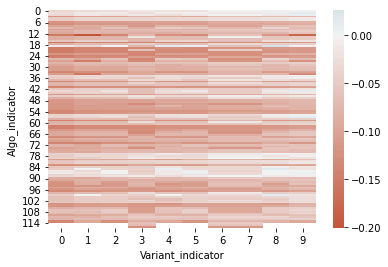

In [ ]:
#Visualisierung Heatmap
# good_it = total#.loc[(total['Score_Diff']>00000)]
# print(good_it.sort_values('Score2'))
# df_hm = good_it.pivot_table(index='Algo_indicator', columns='Variant_indicator', values='Score_Diff')
# cmap = sns.diverging_palette(20, 220, as_cmap=True)

# sns.heatmap(df_hm, cmap=cmap, center=0)

<Figure size 8640x360 with 0 Axes>

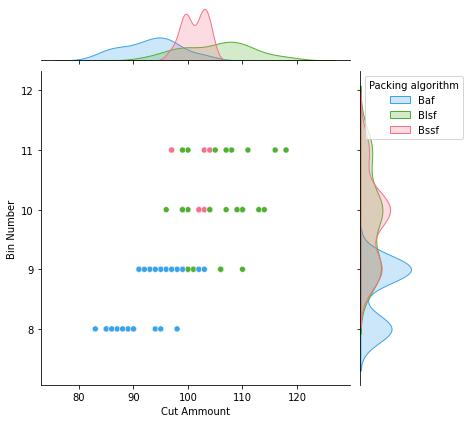

In [ ]:

#Visualisierung Scatterplot
#Fail bei Beschriftung

g = plt.figure(figsize=(120,5))
sns.set_palette("husl",3)
g = sns.jointplot(data=df_visualize_1_Iteration,  x="Cut_Count", y="Bin_Number",
                  kind="scatter", hue="Rect_choice", palette="husl", legend=False)
g.set_axis_labels('Cut Ammount', 'Bin Number', fontsize=10)
plt.legend(title='Packing algorithm', loc='upper left', labels=['Baf', 'Blsf','Bssf'])
plt.show(g)
#g.set(xlabel='common xlabel', ylabel='common ylabel', title='some title')

#for i in range(df_visualize_1_Iteration.shape[0]):
  #df_visualize_1_Iteration['Cut_Count'].apply(lambda x: float(x))
  #df_visualize_1_Iteration['Bin_Number'].apply(lambda x: float(x))
#g = plt.text(df_visualize_1_Iteration['Cut_Count']==431,
#         df_visualize_1_Iteration['Bin_Number']==47,
#         s="hello")
      
 # g = plt.text(x= df_visualize_1_Iteration.Cut_Count[df_visualize_1_Iteration.Cut_Count == "431"],y = df_visualize_1_Iteration.Bin_Number [df_visualize_1_Iteration.Bin_Number== "47"],s= "hello")
#g.plot_marginals(sns.histplot, hue="AxisSplit_choice")

In [ ]:
#Scatter_Plot gut
#
#df = px.data.df_visualize_1_Iteration()



fig = px.scatter(df_visualize_1_Iteration, 
                 x="Cut_Count", 
                 y="Bin_Number", 
                 marginal_x="histogram", 
                 #marginal_y="histogram",
                 color="Rect_choice", 
                 facet_col="Sort_name_1", 
                 labels={
                     "Cut_Count": "Cut Ammount",
                     "Bin_Number": "Bin Number",
                     "Rect_choice": "Packing algorithms"
                 })#, symbol="AxisSplit_choice")
                # width=800, height=800) 

trace = go.Scatter(
        x = help_list,
        y = more_list,
        name = 'Flyeralarm',
        line_color='black',
        showlegend=False
    )



fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.add_trace(trace, row=1, col="all", exclude_empty_subplots=True)
fig.show()

In [ ]:
trace = go.Scatter(
        x = help_list,
        y = more_list,
        name = 'Flyeralarm',
        line_color='black',
        showlegend=False,
)
      




fig = px.scatter(df_visualize_1_Iteration, 
                 x="Cut_Count", 
                 y="Bin_Number", 
                 marginal_x="histogram", 
                 marginal_y="rug",
                 color="Rect_choice", 
                 facet_col="AxisSplit_choice",
                   labels={
                     "Cut_Count": "Cut Ammount",
                     "Bin_Number": "Bin Number",
                     "Rect_choice": "Packing algorithms"
                 }
    ) #facet_row="AxisSplit_choice")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.add_trace(trace, row=1, col="all", exclude_empty_subplots=True)
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cut_Count         126 non-null    int64  
 1   Bin_Number        126 non-null    int64  
 2   Packer_name_1     126 non-null    object 
 3   Sort_name_1       126 non-null    object 
 4   Score_1           126 non-null    float64
 5   Rect_choice       126 non-null    object 
 6   AxisSplit_choice  126 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.0+ KB
None


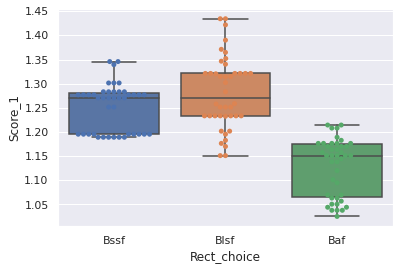

In [ ]:
#Boxplot

# print(df_visualize_1_Iteration.info())
# sns.set(style="darkgrid")
# ax = sns.boxplot(x='Rect_choice', y='Score_1', data=df_visualize_1_Iteration)
# ax = sns.swarmplot(x='Rect_choice', y='Score_1', data=df_visualize_1_Iteration)


In [ ]:
#Ursprüngliche Visualisierung
iteration = True
asd = visualize(df_visualize_1_Iteration, cuts_flyeralarm, bins_flyeralarm, iteration)

Methode 3
WITHOUT TRANSPARENCY
---------------------------------------------------------------------------------------
Methode 4
---------------------------------------------------------------------------------------
Methode 5


# Aufruf

In [ ]:
'''***************************************************************************'''
dict_test={"Day":7.0, "Month":1.0, "Visualization":True, "Number_Best_Results":20}
'''***************************************************************************'''

'***************************************************************************'

In [ ]:
test123, test456 = Auswertung_Flyeralarm(data_path_team1, df_tag)

Flyeralarm:  76252.0


In [ ]:
#Test, ob dieselben Rectangles gepackt werden, nur zur internen Prüfung
#print(dataframe['Variant'][0][1])
rectangle_list = []
for variant in dataframe['Variant']:
  rectangle = []
  length_bin,sum_area = 0, 0
  for bin in variant:
    for rect in bin[2][1]:
      length_bin = (len(bin[2][1])) + length_bin
      width = rect[4]
      height = rect[5]
      area = width + height
      sum_area = sum_area + area
      rectangle.append(area)
  print(sum_area)
  print(len(rectangle))
  rectangle_list.append(rectangle)          
print(length_bin)

76252.0
50
76252.0
50
76252.0
50
76252.0
50
76252.0
50
76252.0
50
76252.0
50
76252.0
50
76252.0
50
76252.0
50
484


In [ ]:
data23 = zip(rectangle_list)
tier = pd.DataFrame(rectangle_list).transpose()
print(tier.info())
tier = pd.DataFrame(np.sort(tier.values, axis=0), index=tier.index, columns=tier.columns)
print(tier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     float64
 1   1       50 non-null     float64
 2   2       50 non-null     float64
 3   3       50 non-null     float64
 4   4       50 non-null     float64
 5   5       50 non-null     float64
 6   6       50 non-null     float64
 7   7       50 non-null     float64
 8   8       50 non-null     float64
 9   9       50 non-null     float64
dtypes: float64(10)
memory usage: 4.0 KB
None
         0       1       2       3       4       5       6       7       8  \
0    511.0   511.0   511.0   511.0   511.0   511.0   511.0   511.0   511.0   
1    512.0   512.0   512.0   512.0   512.0   512.0   512.0   512.0   512.0   
2    512.0   512.0   512.0   512.0   512.0   512.0   512.0   512.0   512.0   
3    512.0   512.0   512.0   512.0   512.0   512.0   512.0   512.0   512.0   
4    724.0   724.

In [ ]:
Measures_df = calc_measures(df_tag)
print(Measures_df)

df_testing = df_tag.merge(Measures_df)

df_testing['Tuple'] = list(zip(df_testing.width, df_testing.height))
rectangles = df_testing['Tuple'].values.tolist()

df_testing['Bin_Tuple'] = list(zip(df_testing.x_sheetsize, df_testing.y_sheetsize))
bins = df_testing['Bin_Tuple'].values.tolist()

list_JobID = np.unique(df_testing['JobID']).tolist()
len(list_JobID)

     Unnamed: 0       DocName  x_left  x_right   y_bot   y_top  x_sheetsize  \
0             0  6593580602_0    48.0   1244.0    41.0   889.0         2494   
1             1  6593580602_1  1845.0   2446.0  1135.0  1736.0         2494   
2             2  6593580602_2  1244.0   1845.0  1312.0  1736.0         2494   
3             3  6593580602_3    48.0   1244.0   889.0  1736.0         2494   
4             4  6593580602_4  1845.0   2446.0    41.0   889.0         2494   
..          ...           ...     ...      ...     ...     ...          ...   
211         211  6665208507_3  1247.0   2452.0   893.0  1749.0         2494   
302         302  6665554301_0    21.0   2473.0    30.0  1756.0         2494   
316         316  6665381401_0    28.0   1857.0    37.0   887.0         2494   
317         317  6665381401_1    28.0   1857.0   887.0  1738.0         2494   
318         318  6665381401_2  1857.0   2466.0    18.0  1738.0         2494   

     y_sheetsize BSig  MarBot  ...  cuts  layer  cu

8

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 8 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 8 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 8 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 8 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 8 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 8 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 8 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 8 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 7 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 7 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 7 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 7 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 7 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 7 

bin: 2494.488189 / 1785.826772 
with nr of rectangles in bin: 7 

bin: 2494.

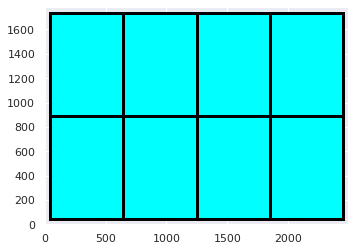

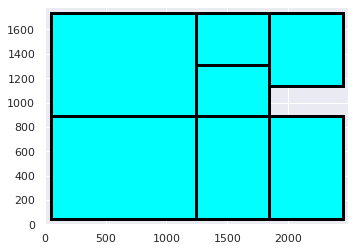

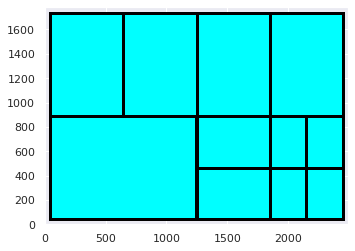

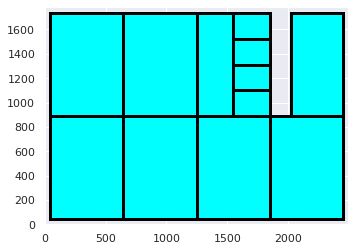

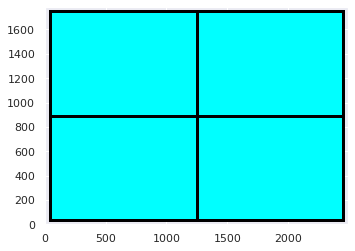

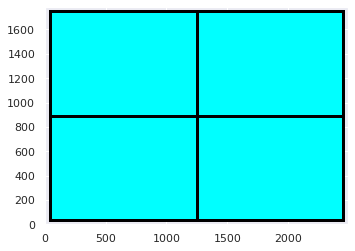

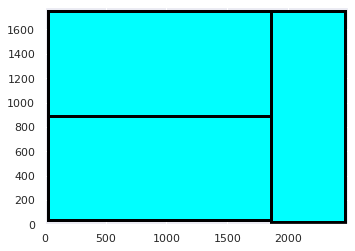

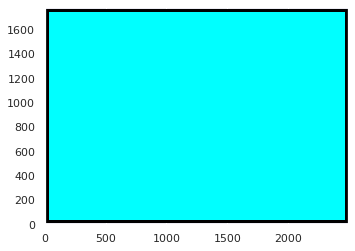

In [ ]:
output = []
bw = 2494.488189    # bin width
bh  = 1785.826772   # bin height

int_range = len(list_JobID)

for ibins in range (int_range):
  int_abin = list_JobID[ibins]
  abin = df_testing.loc[df_testing['JobID'] == int_abin]
  
  fig = plt.figure()
  ax = fig.add_subplot(111, aspect='equal')
  for index, row in abin.iterrows():
    print('bin:', bw, "/", bh, "\nwith nr of rectangles in bin:", len(abin), '\n')
    x, y, w, h = abin.loc[index].x_left, abin.loc[index].y_bot, abin.loc[index].width, abin.loc[index].height
    output.append([x,y,w,h])
    plt.axis([0,bw,0,bh])
    # print(w, h, '\n')
    ax.add_patch(
        patches.Rectangle(
            (x, y),     # (x,y)
            w,          # width
            h,          # height
            facecolor="#00ffff",
            edgecolor="black",
            linewidth=3
        )
    )

  # fig.savefig("rect_%[index]s.png" % locals(), dpi=144, bbox_inches='tight')
  # printing the rectangle coordinates to plot them in P5JS
  # print(output[:])

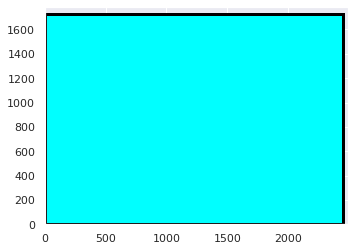

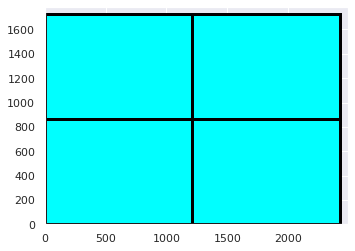

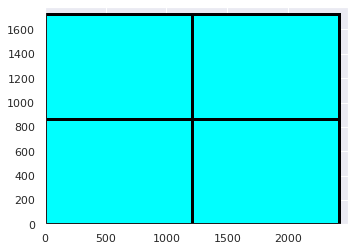

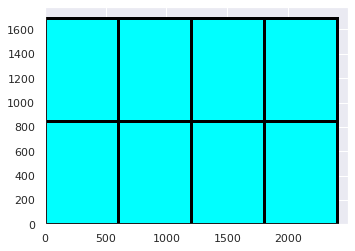

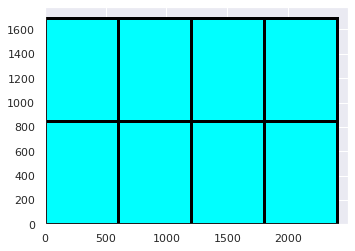

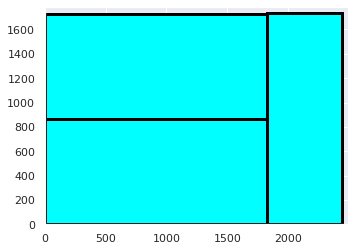

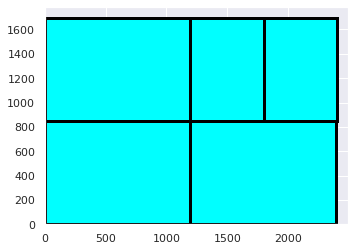

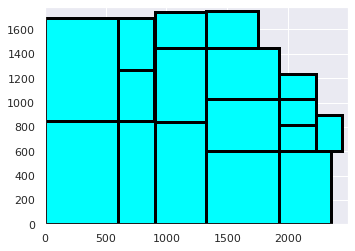

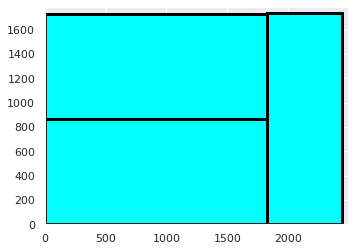

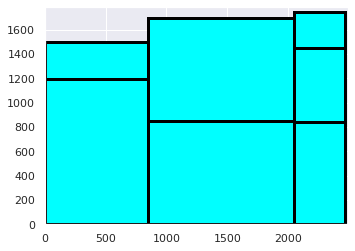

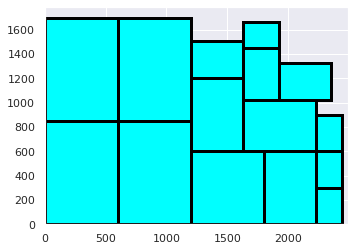

In [ ]:
the_best = simplythebest(dataframe)
layout_GB, layout_BB = get_layout(the_best)
dasgeht = VisulizationBins(layout_GB)
dasgeht2 = VisulizationBins(layout_BB)
hallo = visuelleDarstellung_bestVariant(the_best)

#Test

In [ ]:
print(dataframe['Variant_second_iteration'][0][0])
print(len(dataframe['Variant_second_iteration'][0][0][0]))
sum_list = []
summierterWert = 0
for bin in dataframe['Variant_second_iteration'][2][3][0]:
  for rect in bin[2][1]:
    width = rect[4]
    height = rect[5]
    summierterWert = width + height + summierterWert
sum_list.append(summierterWert)
print(sum_list)

([(0, 7, (0, [[0.0, 0.0, 609.0, 1734.0, 609.0, 1734.0, 0, 0, 0, 0, 7, 0], [609.0, 0.0, 2438.0, 864.0, 1829.0, 864.0, 0, 0, 0, 0, 7, 0], [609.0, 864.0, 2438.0, 1729.0, 1829.0, 865.0, 0, 0, 0, 0, 7, 0]]), False), (1, 18, (1, [[0.0, 0.0, 301.0, 847.0, 301.0, 847.0, 0, 0, 0, 0, 18, 1], [301.0, 0.0, 725.0, 844.0, 424.0, 844.0, 0, 0, 0, 0, 18, 1], [725.0, 0.0, 1922.0, 848.0, 1197.0, 848.0, 0, 0, 0, 0, 18, 1], [725.0, 848.0, 1921.0, 1695.0, 1196.0, 847.0, 0, 0, 0, 0, 18, 1], [301.0, 844.0, 725.0, 1445.0, 424.0, 601.0, 0, 0, 0, 0, 18, 1], [301.0, 1445.0, 725.0, 1745.0, 424.0, 300.0, 0, 0, 0, 0, 18, 1], [0.0, 847.0, 300.0, 1271.0, 300.0, 424.0, 0, 0, 0, 0, 18, 1], [0.0, 1271.0, 301.0, 1695.0, 301.0, 424.0, 0, 0, 0, 0, 18, 1], [1922.0, 0.0, 2222.0, 212.0, 300.0, 212.0, 0, 0, 0, 0, 18, 1], [1922.0, 212.0, 2222.0, 424.0, 300.0, 212.0, 0, 0, 0, 0, 18, 1]]), False), (2, 16, (2, [[0.0, 0.0, 848.0, 1196.0, 848.0, 1196.0, 0, 0, 0, 0, 16, 2], [848.0, 0.0, 1696.0, 601.0, 848.0, 601.0, 0, 0, 0, 0, 16, 2],